## Install the required library

In [55]:
%pip install matplotlib pandas numpy seaborn wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Library

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
raw_df = pd.read_csv('../Data/data_clean.csv')

In [58]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         116 non-null    int64  
 1   text            116 non-null    object 
 2   post_text       116 non-null    object 
 3   time            116 non-null    object 
 4   timestamp       116 non-null    float64
 5   comments        116 non-null    int64  
 6   shares          116 non-null    int64  
 7   comments_full   116 non-null    object 
 8   reactors        116 non-null    object 
 9   reactions       116 non-null    object 
 10  reaction_count  116 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 10.1+ KB


In [59]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [60]:
reactions

{'th√≠ch': 57337,
 'y√™u th√≠ch': 23601,
 'haha': 86,
 'wow': 38,
 'th∆∞∆°ng th∆∞∆°ng': 1462,
 'bu·ªìn': 9,
 'ph·∫´n n·ªô': 15,
 'shares': 761,
 'comments': 1819}

## Reactions analysis

In [61]:
post_df = pd.DataFrame(raw_df)

In [62]:
# Th·ªëng k√™ ra c√°c l∆∞·ª£t th√≠ch, y√™u th√≠ch, haha, ...
post_reaction = post_df
post_reaction[['post_id', 'reactions']]

post_id                                          reactions
0    889347669219012  {'th√≠ch': 57337, 'y√™u th√≠ch': 23601, 'haha': 8...
1    885191366301309  {'th√≠ch': 35408, 'y√™u th√≠ch': 13633, 'haha': 2...
2    883053229848456  {'th√≠ch': 32175, 'y√™u th√≠ch': 10944, 'haha': 2...
3    875769617243484  {'th√≠ch': 35597, 'y√™u th√≠ch': 15372, 'haha': 3...
4    870104804476632  {'th√≠ch': 19669, 'y√™u th√≠ch': 7898, 'haha': 12...
..               ...                                                ...
111  498546568299126  {'th√≠ch': 27097, 'y√™u th√≠ch': 11256, 'haha': 5...
112  470915591062224  {'th√≠ch': 61407, 'y√™u th√≠ch': 25280, 'haha': 1...
113  469016147918835  {'th√≠ch': 43880, 'y√™u th√≠ch': 19954, 'haha': 1...
114  467163998104050  {'th√≠ch': 98268, 'y√™u th√≠ch': 34632, 'haha': 1...
115  461965888623861  {'th√≠ch': 41948, 'y√™u th√≠ch': 21184, 'haha': 3...

[116 rows x 2 columns]

In [63]:
post_df['reaction_count'].mean()

91513.99137931035

In [64]:
# th·ªëng k√™ t·ªïng s·ªë l∆∞·ª£t react b√†i ƒëƒÉng
post_reactions_count = post_df[['time', 'timestamp', 'reaction_count']]
post_reactions_count 

time     timestamp  reaction_count
0    2023-10-30 01:52:25  1.698606e+09           82548
1    2023-10-22 03:23:53  1.697920e+09           49924
2    2023-10-18 04:34:38  1.697578e+09           43853
3    2023-10-05 05:13:06  1.696458e+09           52049
4    2023-09-24 00:14:37  1.695489e+09           28143
..                   ...           ...             ...
111  2022-02-13 03:50:19  1.644699e+09           38791
112  2021-12-30 06:21:29  1.640820e+09           87706
113  2021-12-27 00:51:10  1.640541e+09           64650
114  2021-12-24 01:41:40  1.640285e+09          134266
115  2021-12-15 23:08:12  1.639584e+09           64849

[116 rows x 3 columns]

In [65]:
x = post_reactions_count['time'].to_list()
y = post_reactions_count['reaction_count'].to_list()

x.reverse()
y.reverse()

print(len(x), len(y))
print(x)
print(y)


116 116
['2021-12-15 23:08:12', '2021-12-24 01:41:40', '2021-12-27 00:51:10', '2021-12-30 06:21:29', '2022-02-13 03:50:19', '2022-02-16 06:53:53', '2022-02-27 04:34:41', '2022-03-21 01:30:25', '2022-04-06 05:37:03', '2022-04-27 04:38:10', '2022-05-01 03:09:24', '2022-05-09 03:10:15', '2022-05-19 23:27:48', '2022-05-21 16:18:46', '2022-05-23 04:07:20', '2022-05-23 23:29:59', '2022-05-29 21:21:53', '2022-06-10 01:37:27', '2022-06-12 21:37:47', '2022-07-14 03:48:09', '2022-07-14 23:41:23', '2022-07-16 01:55:37', '2022-07-27 04:40:19', '2022-07-27 23:22:53', '2022-07-30 02:39:36', '2022-07-31 03:14:25', '2022-07-31 23:06:38', '2022-08-03 15:29:11', '2022-08-05 16:42:10', '2022-08-07 02:13:40', '2022-08-08 01:57:02', '2022-08-13 02:07:27', '2022-08-13 23:39:35', '2022-08-20 21:06:09', '2022-08-22 02:25:53', '2022-08-25 06:48:51', '2022-08-28 00:35:15', '2022-09-01 07:01:58', '2022-09-03 04:35:43', '2022-09-04 03:53:28', '2022-09-06 01:34:03', '2022-09-07 04:56:31', '2022-09-14 01:48:19', '2

Text(0, 0.5, 'reaction_count')

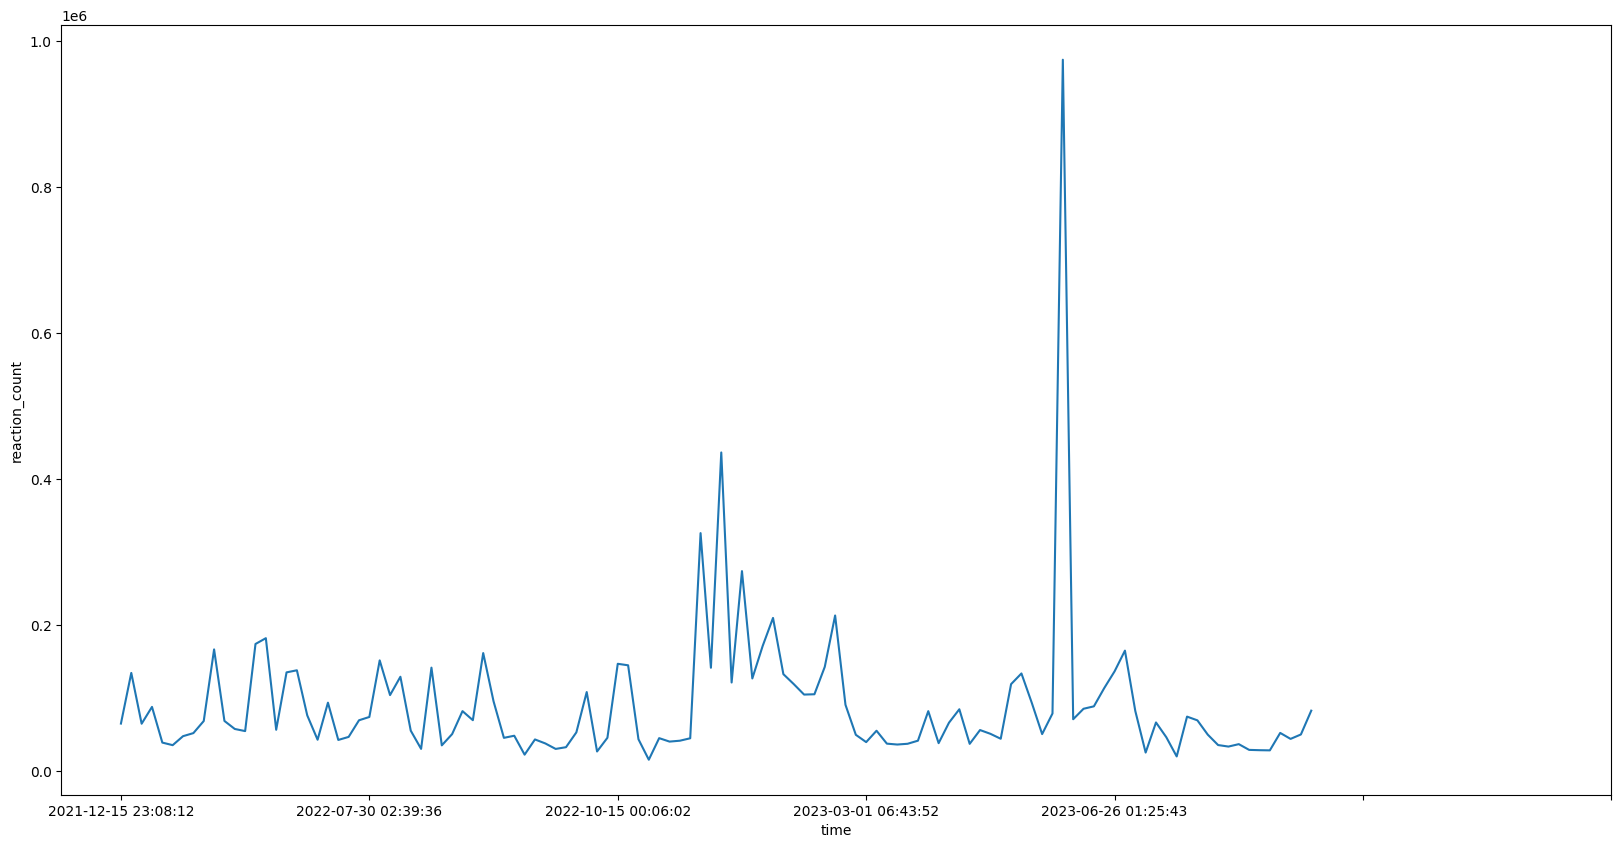

In [66]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xticks(np.arange(0, 24 * 7, 24))
ax.set_xlabel('time')
ax.set_ylabel('reaction_count')

In [67]:
post_reaction['reactions'] = post_reaction['reactions'].apply(lambda x : dict(eval(str(x))))
full_reactions = post_reaction['reactions'].apply(pd.Series)
post_full_reactions = pd.concat([post_reaction, full_reactions], axis=1).drop('reactions', axis=1)
post_full_reactions[['post_text', 'th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 
                             'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng', 'shares', 'comments','reaction_count']]

post_text    th√≠ch  y√™u th√≠ch  \
0    CITY CITY CITY üîµ Thanks my mate, @erling.haala...  57337.0    23601.0   
1         No place like home üè°\n\nKh√¥ng ƒë√¢u b·∫±ng nh√† üè°  35408.0    13633.0   
2    Our #EURO2024 place secured üîí Proud of this te...  32175.0    10944.0   
3          Enjoyed that one! üòÅ\n\nR·∫•t th√≠ch ƒëi·ªÅu ƒë√≥! üòÅ  35597.0    15372.0   
4    Another W üòé Nice to get a goal too üôèüèª\n\nM·ªôt W...  19669.0     7898.0   
..                                                 ...      ...        ...   
111  3Ô∏è‚É£ Points 1Ô∏è‚É£ Goal on the road. Let‚Äôs be havi...  27097.0    11256.0   
112  Goal and three points‚Ä¶ no better way to end th...  61407.0    25280.0   
113  A Christmas cracker!! Enjoy City fans üéÑüéâ\n\nM·ªô...  43880.0    19954.0   
114                                               ‚ùÑÔ∏è‚ùÑÔ∏è  98268.0    34632.0   
115  There are legends and then there are legends. ...  41948.0    21184.0   

      haha   wow   bu·ªìn  ph·∫´n n·ªô  th∆∞∆°ng th∆∞∆°ng  shares  comments  \
0     86.0  38.0    9.0     15.0         1462.0     761      1819   
1     25.0  18.0    2.0      3.0          835.0     281       722   
2     21.0  15.0    1.0     33.0          664.0     252       594   
3     30.0  24.0    1.0      2.0         1023.0     452       962   
4     12.0  14.0    NaN      3.0          547.0     189       599   
..     ...   ...    ...      ...            ...     ...       ...   
111   51.0  17.0    8.0      4.0          358.0     256      1101   
112  136.0  46.0   14.0      9.0          814.0     726      2685   
113  133.0  39.0   10.0     18.0          616.0     574      1656   
114  178.0  95.0   14.0     11.0         1068.0    1090      2790   
115   37.0  11.0  954.0      4.0          711.0     509      1041   

     reaction_count  
0             82548  
1             49924  
2             43853  
3             52049  
4             28143  
..              ...  
111           38791  
112           87706  
113           64650  
114          134266  
115           64849  

[116 rows x 11 columns]

In [68]:
post_df.shape[0]

116

In [69]:
for i in range(post_df.shape[0]):
    if pd.isna(post_full_reactions['th√≠ch'].values[i]):
        post_full_reactions['th√≠ch'].values[i] = 0
    if pd.isna(post_full_reactions['y√™u th√≠ch'].values[i]):
        post_full_reactions['y√™u th√≠ch'].values[i] = 0
    if pd.isna(post_full_reactions['haha'].values[i]):
        post_full_reactions['haha'].values[i] = 0
    if pd.isna(post_full_reactions['wow'].values[i]):
        post_full_reactions['wow'].values[i] = 0
    if pd.isna(post_full_reactions['bu·ªìn'].values[i]):
        post_full_reactions['bu·ªìn'].values[i] = 0
    if pd.isna(post_full_reactions['ph·∫´n n·ªô'].values[i]):
        post_full_reactions['ph·∫´n n·ªô'].values[i] = 0
    if pd.isna(post_full_reactions['th∆∞∆°ng th∆∞∆°ng'].values[i]):
        post_full_reactions['th∆∞∆°ng th∆∞∆°ng'].values[i] = 0
        
        
post_full_reactions[['post_text', 'th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng', 'shares', 'comments','reaction_count']]


post_text    th√≠ch  y√™u th√≠ch  \
0    CITY CITY CITY üîµ Thanks my mate, @erling.haala...  57337.0    23601.0   
1         No place like home üè°\n\nKh√¥ng ƒë√¢u b·∫±ng nh√† üè°  35408.0    13633.0   
2    Our #EURO2024 place secured üîí Proud of this te...  32175.0    10944.0   
3          Enjoyed that one! üòÅ\n\nR·∫•t th√≠ch ƒëi·ªÅu ƒë√≥! üòÅ  35597.0    15372.0   
4    Another W üòé Nice to get a goal too üôèüèª\n\nM·ªôt W...  19669.0     7898.0   
..                                                 ...      ...        ...   
111  3Ô∏è‚É£ Points 1Ô∏è‚É£ Goal on the road. Let‚Äôs be havi...  27097.0    11256.0   
112  Goal and three points‚Ä¶ no better way to end th...  61407.0    25280.0   
113  A Christmas cracker!! Enjoy City fans üéÑüéâ\n\nM·ªô...  43880.0    19954.0   
114                                               ‚ùÑÔ∏è‚ùÑÔ∏è  98268.0    34632.0   
115  There are legends and then there are legends. ...  41948.0    21184.0   

      haha   wow   bu·ªìn  ph·∫´n n·ªô  th∆∞∆°ng th∆∞∆°ng  shares  comments  \
0     86.0  38.0    9.0     15.0         1462.0     761      1819   
1     25.0  18.0    2.0      3.0          835.0     281       722   
2     21.0  15.0    1.0     33.0          664.0     252       594   
3     30.0  24.0    1.0      2.0         1023.0     452       962   
4     12.0  14.0    0.0      3.0          547.0     189       599   
..     ...   ...    ...      ...            ...     ...       ...   
111   51.0  17.0    8.0      4.0          358.0     256      1101   
112  136.0  46.0   14.0      9.0          814.0     726      2685   
113  133.0  39.0   10.0     18.0          616.0     574      1656   
114  178.0  95.0   14.0     11.0         1068.0    1090      2790   
115   37.0  11.0  954.0      4.0          711.0     509      1041   

     reaction_count  
0             82548  
1             49924  
2             43853  
3             52049  
4             28143  
..              ...  
111           38791  
112           87706  
113           64650  
114          134266  
115           64849  

[116 rows x 11 columns]

In [70]:
post_full_reactions['time']

0      2023-10-30 01:52:25
1      2023-10-22 03:23:53
2      2023-10-18 04:34:38
3      2023-10-05 05:13:06
4      2023-09-24 00:14:37
              ...         
111    2022-02-13 03:50:19
112    2021-12-30 06:21:29
113    2021-12-27 00:51:10
114    2021-12-24 01:41:40
115    2021-12-15 23:08:12
Name: time, Length: 116, dtype: object

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

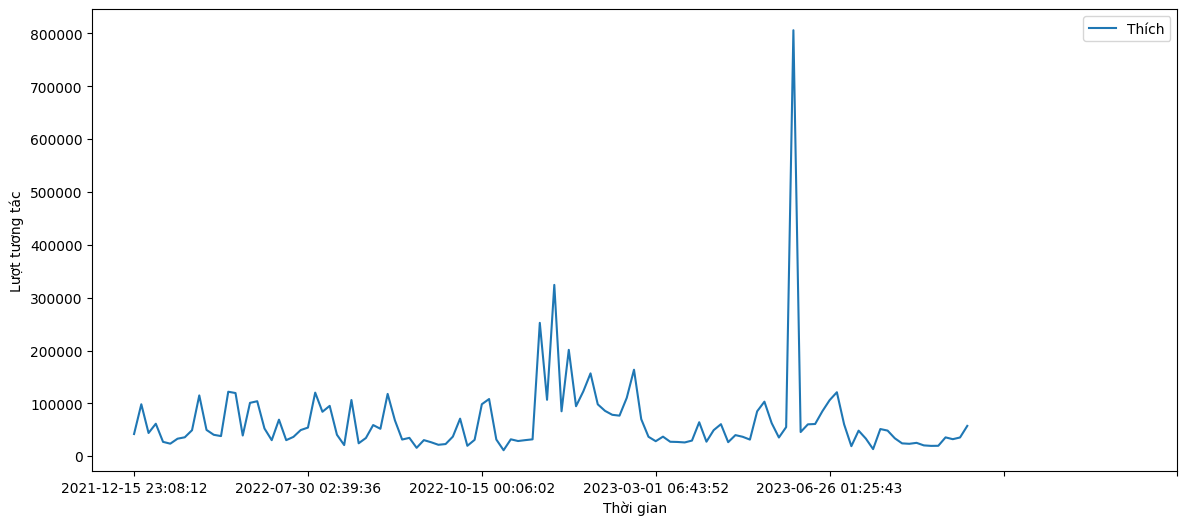

In [71]:
time = post_full_reactions['time'].to_list()
like = post_full_reactions['th√≠ch'].to_list()
time.reverse(), like.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, like, label = 'Th√≠ch')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

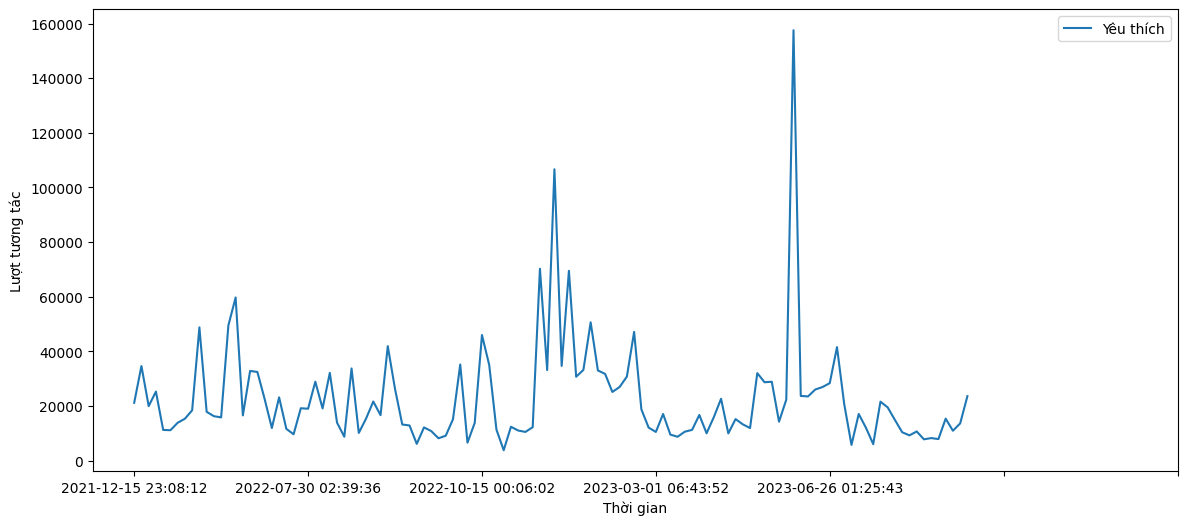

In [72]:
time = post_full_reactions['time'].to_list()
love = post_full_reactions['y√™u th√≠ch'].to_list()
time.reverse(), love.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, love, label = 'Y√™u th√≠ch')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

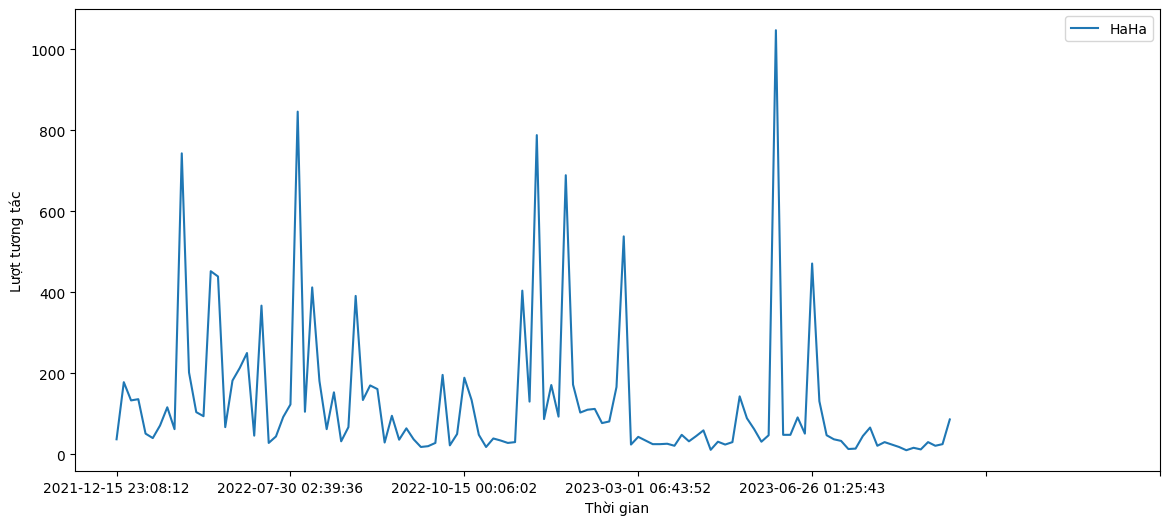

In [73]:
time = post_full_reactions['time'].to_list()
haha = post_full_reactions['haha'].to_list()
time.reverse(), haha.reverse()
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, haha, label = 'HaHa')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

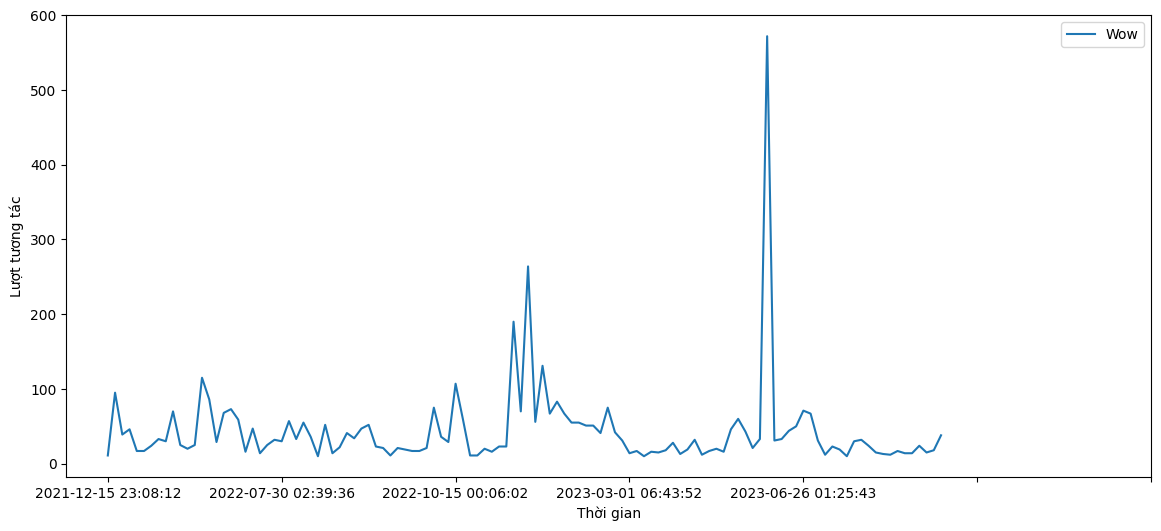

In [74]:
time = post_full_reactions['time'].to_list()
wow = post_full_reactions['wow'].to_list()
reactions_count = post_full_reactions['reaction_count'].to_list()
time.reverse(), wow.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, wow, label = 'Wow')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

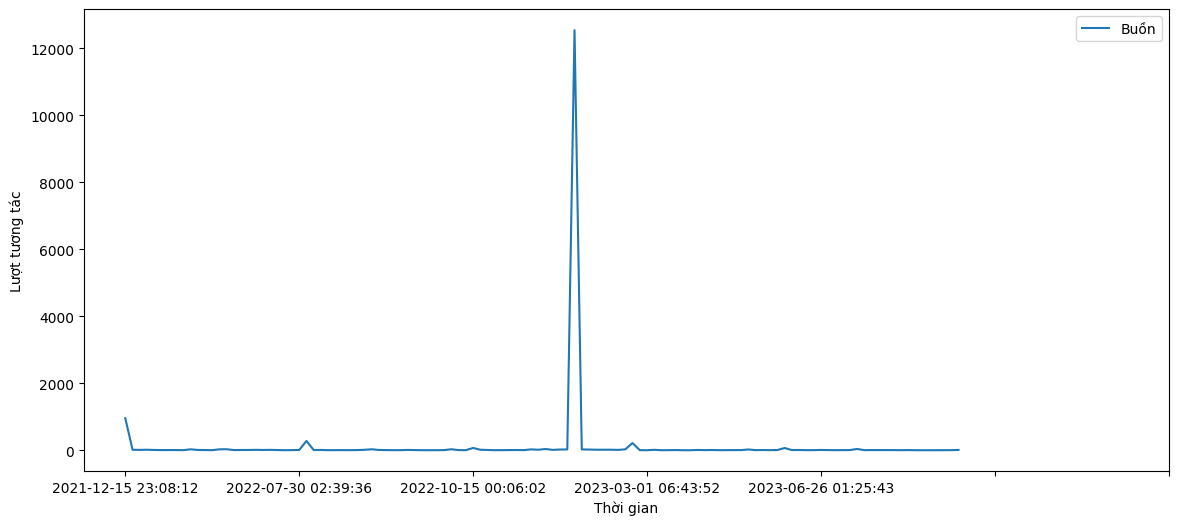

In [75]:
time = post_full_reactions['time'].to_list()
sad = post_full_reactions['bu·ªìn'].to_list()
time.reverse(), sad.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, sad, label = 'Bu·ªìn')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

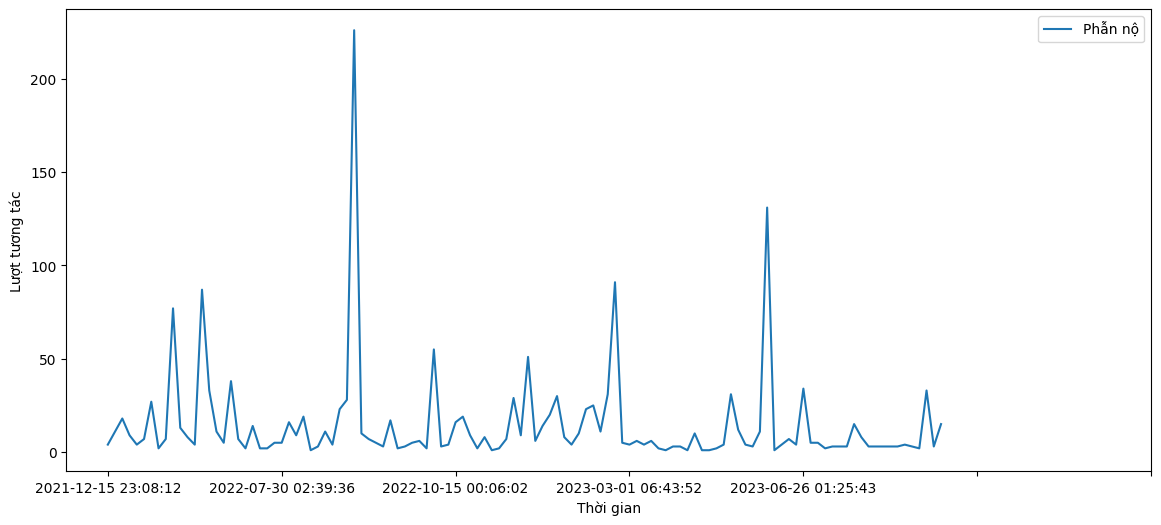

In [76]:
time = post_full_reactions['time'].to_list()
angry = post_full_reactions['ph·∫´n n·ªô'].to_list()
time.reverse(), angry.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, angry, label = 'Ph·∫´n n·ªô')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

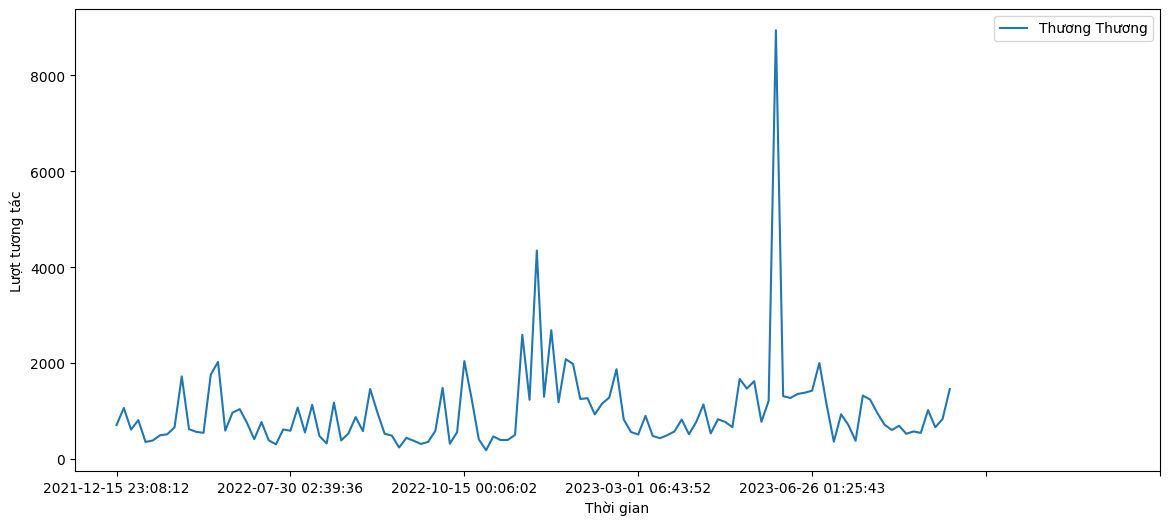

In [77]:
time = post_full_reactions['time'].to_list()
care = post_full_reactions['th∆∞∆°ng th∆∞∆°ng'].to_list()

time.reverse(), care.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, care, label = 'Th∆∞∆°ng Th∆∞∆°ng')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

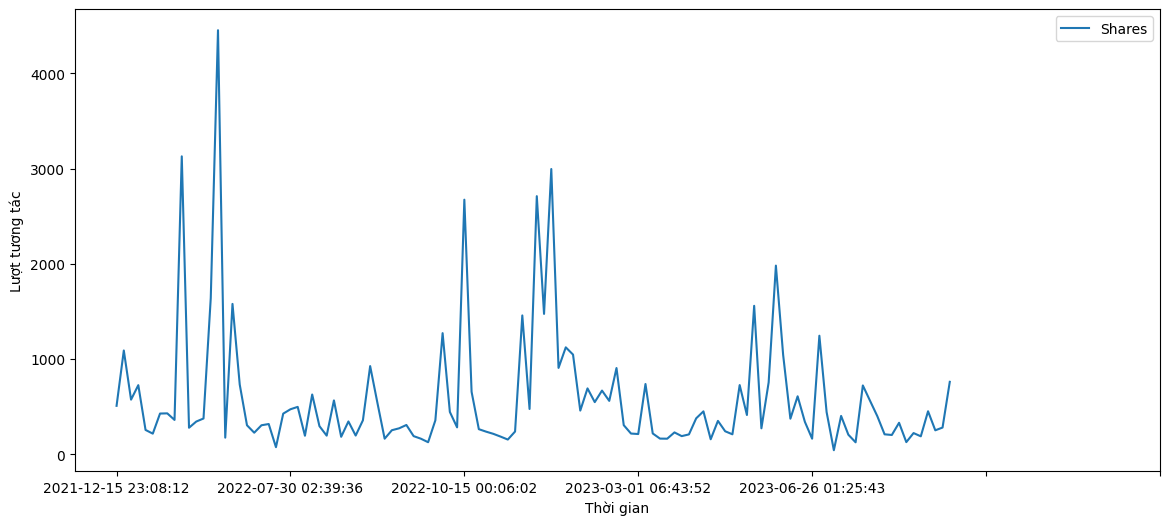

In [78]:
time = post_full_reactions['time'].to_list()
share = post_full_reactions['shares'].to_list()
time.reverse(), share.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, share, label = 'Shares')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

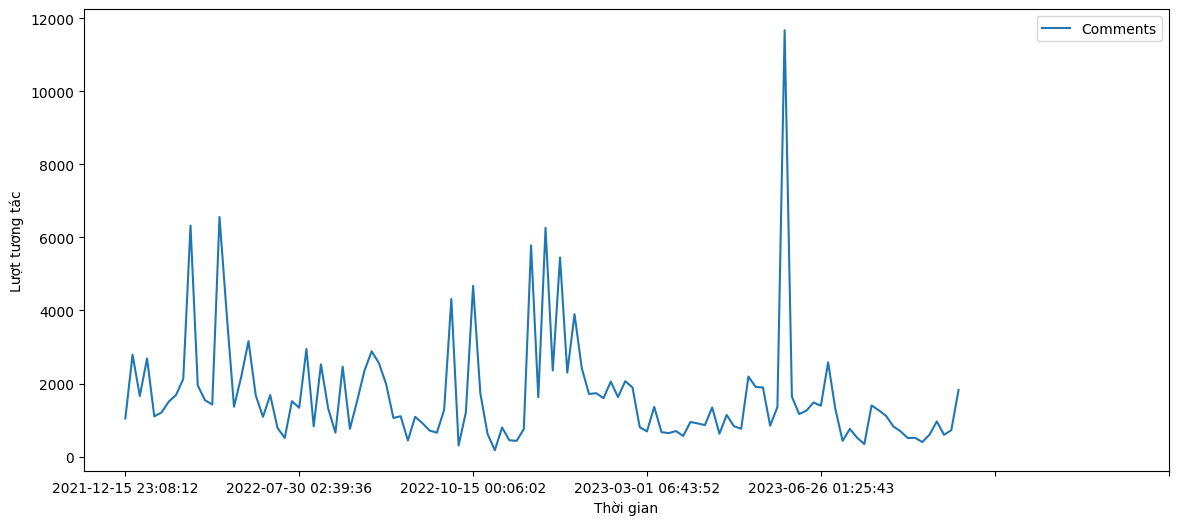

In [79]:
time = post_full_reactions['time'].to_list()
comments = post_full_reactions['comments'].to_list()
time.reverse(), share.reverse(), comments.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, comments, label = 'Comments')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

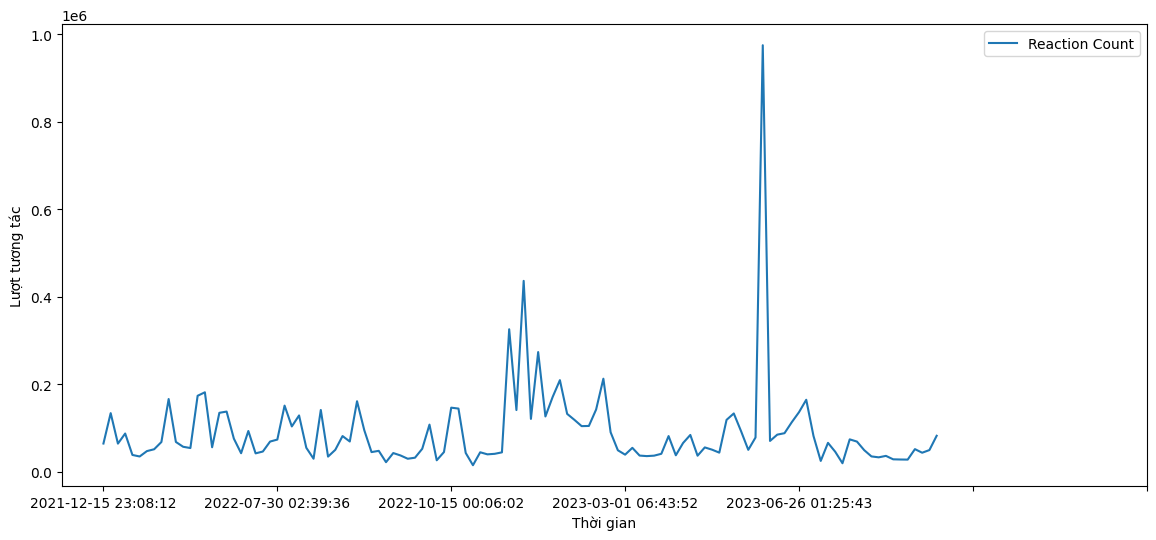

In [80]:
time = post_full_reactions['time'].to_list()
reactions_count = post_full_reactions['reaction_count'].to_list()
time.reverse(), reactions_count.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, reactions_count, label = 'Reaction Count')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

Text(0, 0.5, 'L∆∞·ª£t t∆∞∆°ng t√°c')

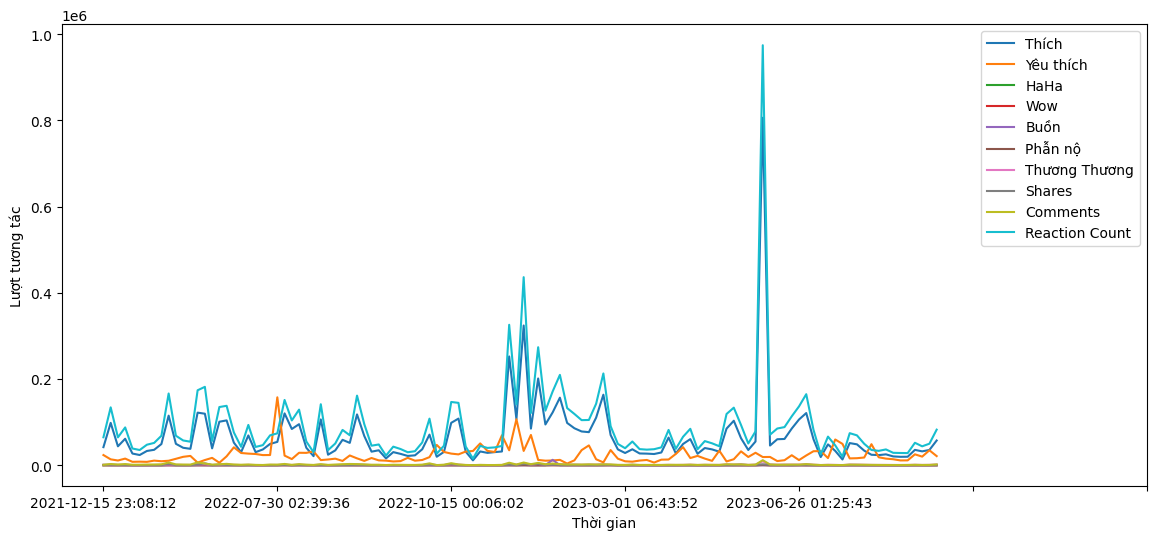

In [81]:
time = post_full_reactions['time'].to_list()
like = post_full_reactions['th√≠ch'].to_list()
love = post_full_reactions['y√™u th√≠ch'].to_list()
haha = post_full_reactions['haha'].to_list()
wow = post_full_reactions['wow'].to_list()
sad = post_full_reactions['bu·ªìn'].to_list()
angry = post_full_reactions['ph·∫´n n·ªô'].to_list()
care = post_full_reactions['th∆∞∆°ng th∆∞∆°ng'].to_list()
share = post_full_reactions['shares'].to_list()
comments = post_full_reactions['comments'].to_list()
reactions_count = post_full_reactions['reaction_count'].to_list()
time.reverse(), like.reverse(), haha.reverse(), wow.reverse(), sad.reverse(), angry.reverse(), care.reverse(), share.reverse(), comments.reverse(), reactions_count.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, like, label = 'Th√≠ch')
ax.plot(time, love, label = 'Y√™u th√≠ch')
ax.plot(time, haha, label = 'HaHa')
ax.plot(time, wow, label = 'Wow')
ax.plot(time, sad, label = 'Bu·ªìn')
ax.plot(time, angry, label = 'Ph·∫´n n·ªô')
ax.plot(time, care, label = 'Th∆∞∆°ng Th∆∞∆°ng')
ax.plot(time, share, label = 'Shares')
ax.plot(time, comments, label = 'Comments')
ax.plot(time, reactions_count, label = 'Reaction Count')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Th·ªùi gian')
ax.set_ylabel('L∆∞·ª£t t∆∞∆°ng t√°c')

In [82]:
print(post_full_reactions[['th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng']].corrwith(post_full_reactions['shares']))

th√≠ch            0.525517
y√™u th√≠ch        0.729790
haha             0.547736
wow              0.552648
bu·ªìn             0.077397
ph·∫´n n·ªô          0.318153
th∆∞∆°ng th∆∞∆°ng    0.613716
dtype: float64


In [83]:
tuong_tac = post_full_reactions.copy()
max_reaction = max(tuong_tac['reaction_count'])
a = ''
for i in range(tuong_tac.shape[0]):
    if tuong_tac['reaction_count'][i] == max_reaction:
        a = tuong_tac.loc[i]
        print(a)

post_id                                             815092239977889
text                                  Let‚Äôs go ‚úàÔ∏èüáπüá∑\n\nƒêi th√¥i ‚úàÔ∏èüáπüá∑
post_text                             Let‚Äôs go ‚úàÔ∏èüáπüá∑\n\nƒêi th√¥i ‚úàÔ∏èüáπüá∑
time                                            2023-06-09 04:07:55
timestamp                                              1686258475.0
comments                                                      11675
shares                                                         1981
comments_full     [{'comment_id': '24090374927220099', 'comment_...
reactors          [{'name': 'A√Øcha Hillal', 'link': 'https://fac...
reaction_count                                               974503
th√≠ch                                                      806200.0
y√™u th√≠ch                                                  157544.0
haha                                                         1047.0
wow                                                           57

In [84]:
a[['post_text', 'time', 'comments', 'shares', 'reaction_count', 'th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'th∆∞∆°ng th∆∞∆°ng', 'bu·ªìn', 'ph·∫´n n·ªô']]

post_text         Let‚Äôs go ‚úàÔ∏èüáπüá∑\n\nƒêi th√¥i ‚úàÔ∏èüáπüá∑
time                        2023-06-09 04:07:55
comments                                  11675
shares                                     1981
reaction_count                           974503
th√≠ch                                  806200.0
y√™u th√≠ch                              157544.0
haha                                     1047.0
wow                                       572.0
th∆∞∆°ng th∆∞∆°ng                            8943.0
bu·ªìn                                       66.0
ph·∫´n n·ªô                                   131.0
Name: 24, dtype: object

+ Ch·ªß y·∫øu l∆∞·ª£t t∆∞∆°ng t√°c ƒë·∫øn t·ª´ l∆∞·ª£t "Th√≠ch" v√† "Y√™u th√≠ch"

# Posts analysis

### 1. B√†i vi·∫øt c√≥ l∆∞·ª£ng t∆∞∆°ng t√°c l·ªõn nh·∫•t

In [85]:
post_df['total_interaction'] = post_df['reaction_count'] + post_df['comments'] + post_df['shares']
highest_interaction_post = post_df.loc[post_df['total_interaction'] == post_df['total_interaction'].max()]

In [86]:
highest_interaction_post

post_id                           text  \
24  815092239977889  Let‚Äôs go ‚úàÔ∏èüáπüá∑\n\nƒêi th√¥i ‚úàÔ∏èüáπüá∑   

                        post_text                 time     timestamp  \
24  Let‚Äôs go ‚úàÔ∏èüáπüá∑\n\nƒêi th√¥i ‚úàÔ∏èüáπüá∑  2023-06-09 04:07:55  1.686258e+09   

    comments  shares                                      comments_full  \
24     11675    1981  [{'comment_id': '24090374927220099', 'comment_...   

                                             reactors  \
24  [{'name': 'A√Øcha Hillal', 'link': 'https://fac...   

                                            reactions  reaction_count  \
24  {'th√≠ch': 806200, 'y√™u th√≠ch': 157544, 'haha':...          974503   

    total_interaction  
24             988159

### 2. M·ªëc th·ªùi gian ƒëƒÉng b√†i

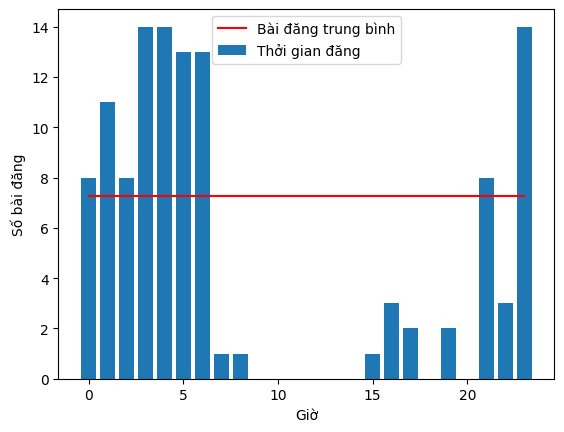

In [87]:
# Chuy·ªÉn c·ªôt 'time' sang ƒë·ªãnh d·∫°ng th·ªùi gian n·∫øu ch∆∞a c√≥
post_df['time'] = pd.to_datetime(post_df['time'])

# Tr√≠ch xu·∫•t gi·ªù t·ª´ c·ªôt th·ªùi gian
post_df['hour'] = post_df['time'].dt.hour

# Ti·∫øp t·ª•c v·ªõi ph·∫ßn plot
plot_data = post_df['hour'].value_counts().sort_index()
mean = post_df['hour'].value_counts().mean() * np.ones(len(plot_data))
plt.bar(plot_data.index, plot_data.values, label='Th·ªüi gian ƒëƒÉng')
plt.plot(plot_data.index, mean, color='red', label='B√†i ƒëƒÉng trung b√¨nh')
plt.legend()
plt.ylabel('S·ªë b√†i ƒëƒÉng')
plt.xlabel('Gi·ªù')
plt.show()


### 3. T√¨m c√°c b√†i vi·∫øt ch·ª©a 1 t·ª´ kh√≥a n√†o ƒë√≥


In [88]:
a = post_full_reactions['post_text'].tolist()

res = []
for x in a:
    if 'champions' in str(x).lower():
        res.append(x)

print('S·ªë b√†i vi·∫øt c√≥ t·ª´ "champions":',len(res))
res

S·ªë b√†i vi·∫øt c√≥ t·ª´ "champions": 7


['Champions League nights are back‚Ä¶\n\nƒê√™m Champions League ƒë√£ tr·ªü l·∫°i...',
 'Champions of Europe!!!! This club man, what a dream come true ü§©\U0001fa75üèÜ\n\nNh√† v√¥ ƒë·ªãch Ch√¢u √Çu!!!! C√¢u l·∫°c b·ªô n√†y, th·∫≠t l√† m·ªôt gi·∫•c m∆° tr·ªü th√†nh s·ª± th·∫≠t ü§©\U0001fa75üèÜ',
 'Big night coming up! @championsleague üîú\n\nƒê√™m quan tr·ªçng s·∫Øp ƒë·∫øn! @championsleague üîú',
 '@championsleague üîú',
 'It feels mint to be back playing in the Champions League! So pleased to have got my 10th CL goal and my 47th for City üôèüèª Cheers for all the support üëäüèªüíô\n\nC·∫£m gi√°c b·∫°c h√† khi ƒë∆∞·ª£c quay tr·ªü l·∫°i thi ƒë·∫•u t·∫°i Champions League! R·∫•t vui m·ª´ng khi c√≥ ƒë∆∞·ª£c b√†n th·∫Øng th·ª© 10 CL v√† th·ª© 47 c·ªßa t√¥i cho City üôèüèª Ch√∫c m·ª´ng v√¨ t·∫•t c·∫£ s·ª± ·ªßng h·ªô üëäüèªüíô',
 'Champions League mode üîõ\n\n#ucl\n\nCh·∫ø ƒë·ªô Champions League üîõ\n\n#ucl',
 'Champions!! I‚Äôll never get bored of the feeling!! What a team!!

In [89]:
df_text = post_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

post_id                                          post_text
0    889347669219012  CITY CITY CITY üîµ Thanks my mate, @erling.haala...
1    885191366301309       No place like home üè°\n\nKh√¥ng ƒë√¢u b·∫±ng nh√† üè°
2    883053229848456  Our #EURO2024 place secured üîí Proud of this te...
3    875769617243484        Enjoyed that one! üòÅ\n\nR·∫•t th√≠ch ƒëi·ªÅu ƒë√≥! üòÅ
4    870104804476632  Another W üòé Nice to get a goal too üôèüèª\n\nM·ªôt W...
..               ...                                                ...
111  498546568299126  3Ô∏è‚É£ Points 1Ô∏è‚É£ Goal on the road. Let‚Äôs be havi...
112  470915591062224  Goal and three points‚Ä¶ no better way to end th...
113  469016147918835  A Christmas cracker!! Enjoy City fans üéÑüéâ\n\nM·ªô...
114  467163998104050                                               ‚ùÑÔ∏è‚ùÑÔ∏è
115  461965888623861  There are legends and then there are legends. ...

[116 rows x 2 columns]

### 4. T·∫ßn su·∫•t c√°c t·ª´ ƒë∆∞·ª£c s·ª≠ d·ª•ng nhi·ªÅu nh·∫•t qua th·ªëng k√™

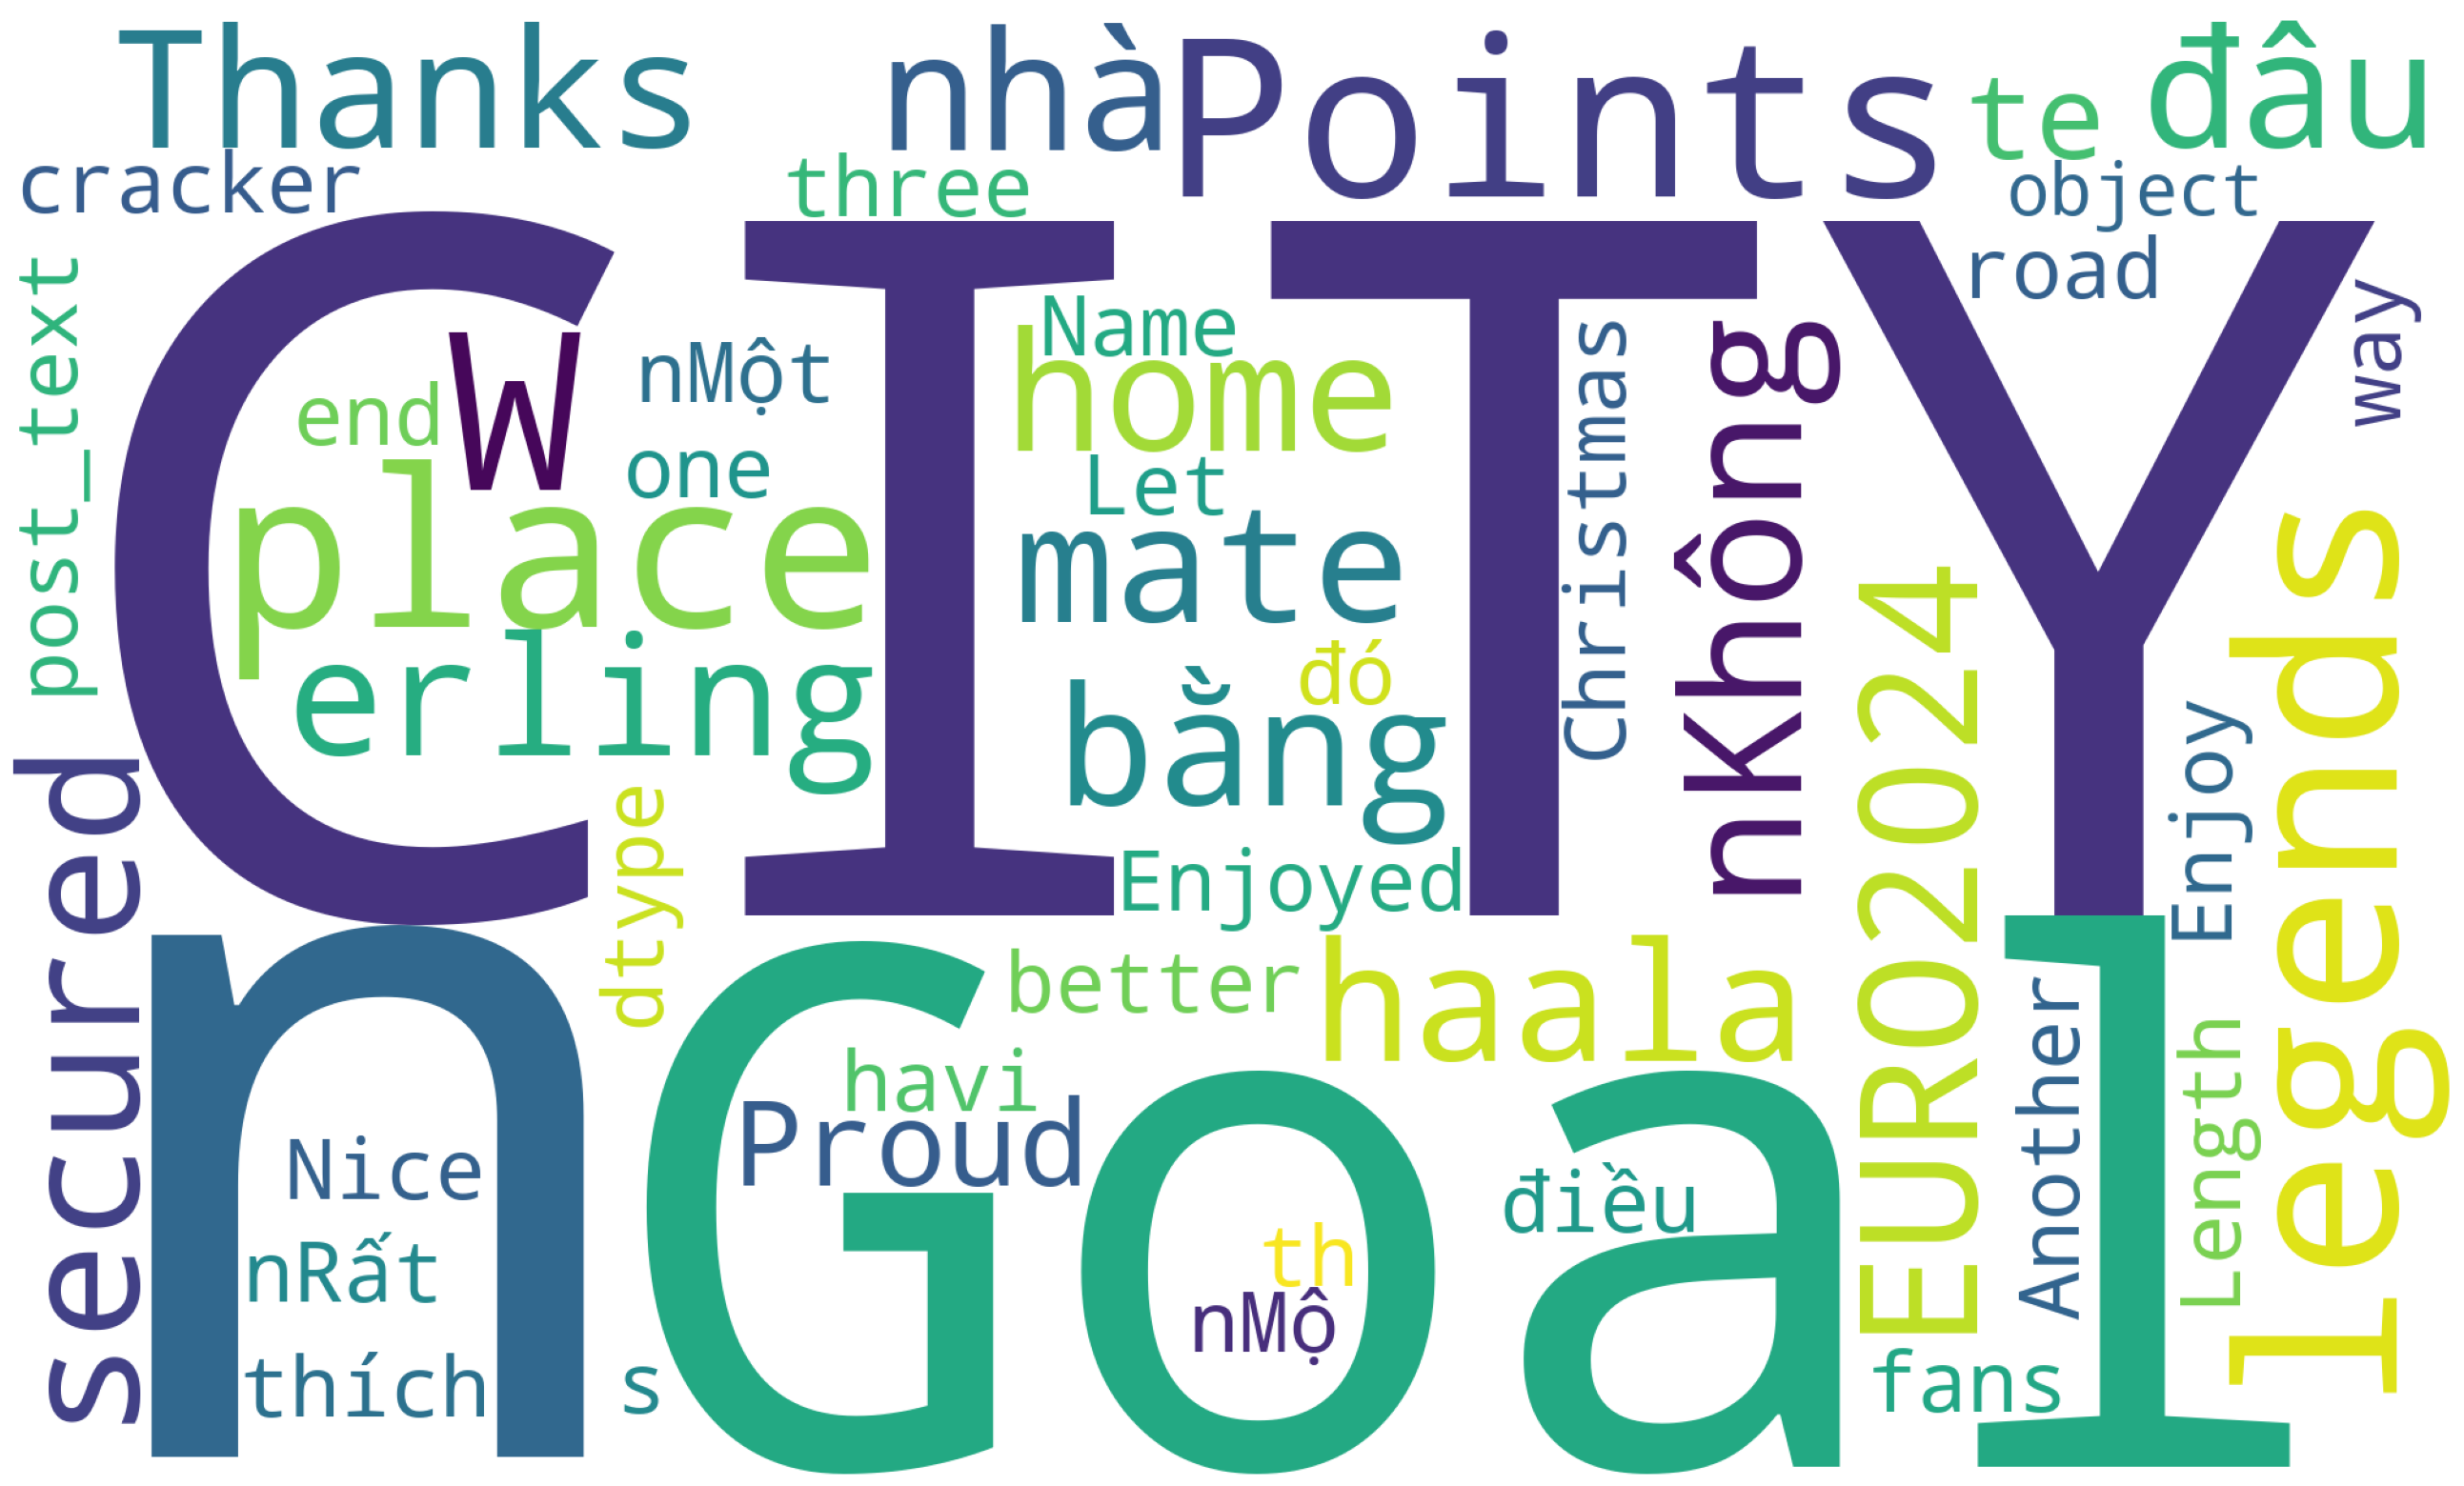

In [90]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [91]:
text_fix=text 
print(len(text))
text

670


'0      CITY CITY CITY üîµ Thanks my mate, @erling.haala...\n1           No place like home üè°\\n\\nKh√¥ng ƒë√¢u b·∫±ng nh√† üè°\n2      Our #EURO2024 place secured üîí Proud of this te...\n3            Enjoyed that one! üòÅ\\n\\nR·∫•t th√≠ch ƒëi·ªÅu ƒë√≥! üòÅ\n4      Another W üòé Nice to get a goal too üôèüèª\\n\\nM·ªôt W...\n                             ...                        \n111    3Ô∏è‚É£ Points 1Ô∏è‚É£ Goal on the road. Let‚Äôs be havi...\n112    Goal and three points‚Ä¶ no better way to end th...\n113    A Christmas cracker!! Enjoy City fans üéÑüéâ\\n\\nM·ªô...\n114                                                 ‚ùÑÔ∏è‚ùÑÔ∏è\n115    There are legends and then there are legends. ...\nName: post_text, Length: 116, dtype: object'